In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
mainloc='/content/drive/My Drive/Research/ABSA_Final/'
mainloc

'/content/drive/My Drive/Research/ABSA_Final/'

In [ ]:
import pandas as pd 
import numpy as np 
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import wordnet
import pandas as pd 
import numpy as np 
from nltk.tokenize import word_tokenize
import re
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import wordnet
import pandas as pd 
import numpy as np 
import string
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
from nltk.tag import UnigramTagger
from nltk.corpus import treebank
import pandas as pd 
import numpy as np 
import string
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import gensim
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
import seaborn as sns 
import re  # For preprocessing
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import spacy  # For preprocessing
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt 
from xlwt import Workbook 
import wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import time
import warnings

import nltk
nltk.download('stopwords')

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


drive  sample_data


In [ ]:
df=pd.read_csv(mainloc+"df_train.csv")
df=df[~df['cleanAnswer'].isna()]
df.head(2)
print("size of training dataset: ", df.shape)
df.head(2)

FileNotFoundError: ignored

In [ ]:
df.tail(2)

,id,comment,network,billing_price,package,customer_service,data,service_product,sentiment,cleanAnswer,cleanAnswer1,tokens,nwords,singperc,comment_len
10058,172066,Unlimited nam wenwa et godak slow wela balagena,1,1,0,0,0,0,0,unlimited nam wenwa et godak slow wela balagena,unlimited nam wenwa et godak slow wela balagena,"['unlimited', 'nam', 'wenwa', 'et', 'godak', '...",8,75.0,47
10059,179161,Whatsapp package ekakuth meth ekama dunan goda...,0,0,1,0,1,0,-1,whatsapp package ekakuth meth ekama dunan goda...,whatsapp package ekakuth meth ekama dunan goda...,"['whatsapp', 'package', 'ekakuth', 'meth', 'ek...",8,75.0,56


INFO - 17:21:55: NumExpr defaulting to 2 threads.


64.46609663949096
2.8832769934380593
32.65062636707099


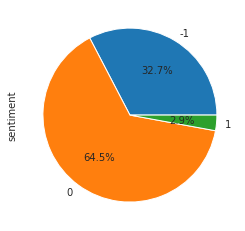

In [ ]:
#Sentiment distribution 
print((df[df['sentiment']==0].shape[0]/df.shape[0])*100)
print((df[df['sentiment']==1].shape[0]/df.shape[0])*100)
print((df[df['sentiment']==-1].shape[0]/df.shape[0])*100)

#groupby the data by delivery type
data = df.groupby("sentiment")["sentiment"].count()
data
data.plot.pie(autopct="%.1f%%");

In [ ]:
df[df['sentiment']==1].shape[0]

290

(array([1.800e+01, 3.800e+02, 2.011e+03, 2.225e+03, 1.408e+03, 4.680e+02,
        7.150e+02, 6.000e+02, 4.530e+02, 3.880e+02, 2.790e+02, 2.030e+02,
        1.420e+02, 1.340e+02, 1.000e+02, 9.600e+01, 6.700e+01, 5.100e+01,
        5.300e+01, 3.300e+01, 2.800e+01, 2.900e+01, 1.900e+01, 2.100e+01,
        2.000e+01, 1.400e+01, 6.000e+00, 1.000e+01, 1.400e+01, 8.000e+00,
        8.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 6.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

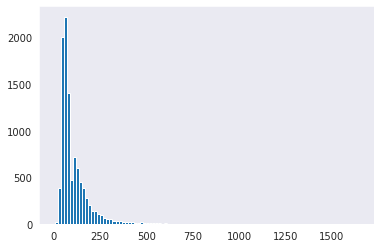

In [ ]:
plt.hist(df.comment_len,bins=100)

In [ ]:
df[["comment_len"]].describe()

,comment_len
count,10058.000000
mean,103.841917
std,85.434463
min,4.000000
25%,54.000000
50%,73.000000
75%,127.000000
max,1648.000000


In [ ]:
df[['comment_len','sentiment']].groupby('sentiment').median().reset_index()

,sentiment,comment_len
0,-1,62
1,0,85
2,1,61


(array([4.200e+01, 3.134e+03, 1.095e+03, 1.511e+03, 7.540e+02, 5.040e+02,
        2.400e+02, 1.970e+02, 1.010e+02, 7.300e+01, 4.800e+01, 4.400e+01,
        2.500e+01, 2.400e+01, 1.500e+01, 1.000e+01, 8.000e+00, 1.100e+01,
        4.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   6.54,  12.08,  17.62,  23.16,  28.7 ,  34.24,  39.78,
         45.32,  50.86,  56.4 ,  61.94,  67.48,  73.02,  78.56,  84.1 ,
         89.64,  95.18, 100.72, 106.26, 111.8 , 117.34, 122.88, 128.42,
        133.96, 139.5 , 145.04, 150.58, 156.12, 161.66, 167.2 , 172.74,
        178.28, 183.82, 189.36, 194.9 , 200.44, 205.98, 211.52, 217.06,
        222.6 , 

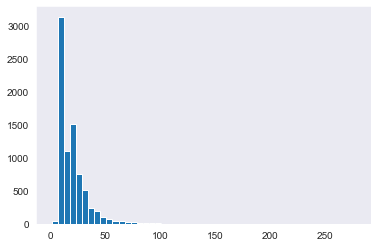

In [ ]:
#Number of words distribution 
plt.hist(df.nwords,bins=50)

In [ ]:
df[["nwords"]].describe()
df[['nwords','sentiment']].groupby('sentiment').median().reset_index()

,sentiment,nwords
0,-1,10
1,0,14
2,1,10


In [ ]:
#Word_count analysis 

dfWordsCount=df.groupby('nwords').count().reset_index()[['nwords','cleanAnswer']]
dfWordsCount['percentage'] = (dfWordsCount['cleanAnswer']/dfWordsCount['cleanAnswer'].sum())*100
dfWordsCount.sort_values('percentage',ascending=False)

,nwords,cleanAnswer,percentage
8,11,1038,13.204427
9,12,895,11.385320
7,10,711,9.044651
10,13,543,6.907518
6,9,304,3.867192
...,...,...,...
82,85,1,0.012721
78,81,1,0.012721
77,80,1,0.012721
66,69,1,0.012721


(array([  4.,   0.,   0.,   2.,   2.,   6.,   3.,   5.,  11.,   2.,   4.,
          6.,  21.,   4.,  14.,  15.,  38.,   8.,  39.,  22.,  62.,  49.,
        110.,  83.,  18., 328., 193., 317., 210., 296., 490., 436., 276.,
        482., 390., 497., 517., 391., 377., 172., 519., 303., 180., 108.,
        137., 394.,  57.,  46.,  11., 206.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 50 artists>)

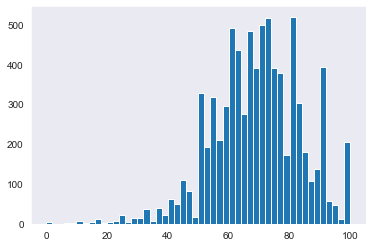

In [ ]:
#Number of singlish words distribution 
plt.hist(df.singperc,bins=50)

In [ ]:
df[["singperc"]].describe()
df[['singperc','sentiment']].groupby('sentiment').median().reset_index()

,sentiment,singperc
0,-1,70.900538
1,0,70.370370
2,1,71.428571


<AxesSubplot:xlabel='customer_service', ylabel='count'>

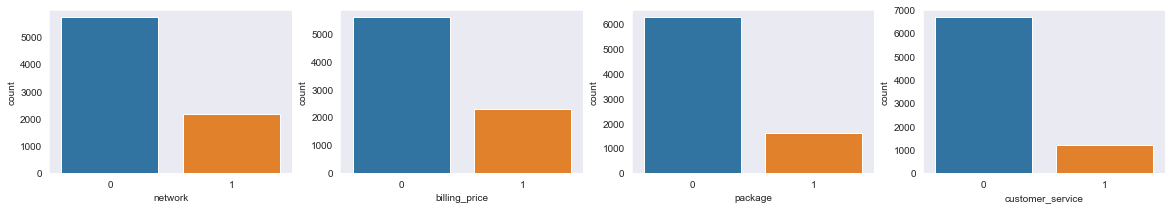

In [ ]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20,3))
sns.countplot(ax=ax1,x='network', data=df)
sns.countplot(ax=ax2,x='billing_price', data=df)
sns.countplot(ax=ax3,x='package', data=df)
sns.countplot(ax=ax4,x='customer_service', data=df)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

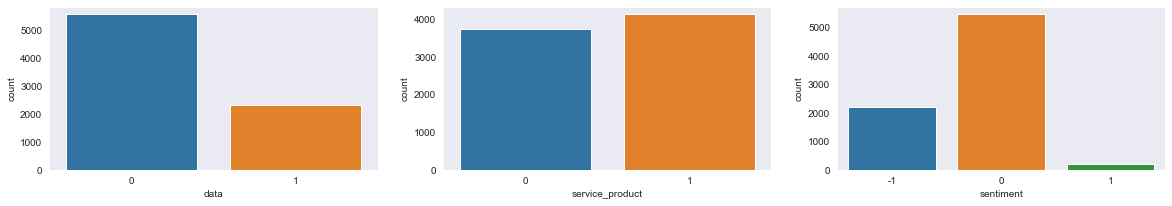

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,3))
sns.countplot(ax=ax1,x='data', data=df)
sns.countplot(ax=ax2,x='service_product', data=df)
sns.countplot(ax=ax3,x='sentiment', data=df)

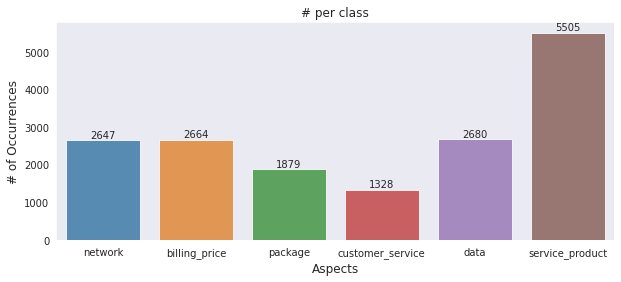

network             2647
billing_price       2664
package             1879
customer_service    1328
data                2680
service_product     5505
dtype: int64

In [ ]:
#Number of elements according to each aspect 
x=df.iloc[:,2:8].sum()
#plot
plt.figure(figsize=(10,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Aspects', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()
x

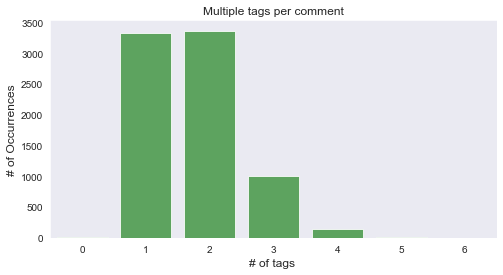

2    3365
1    3334
3    1005
4     136
5      11
0       9
6       1
dtype: int64

In [ ]:
#Multitagged elements 
rowsums=df.iloc[:,2:8].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
#rects = ax.patches
#labels = x.values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
x=rowsums.value_counts()
x

             network  billing_price    package  customer_service       data  \
sentiment                                                                     
-1         10.162413      21.002179  36.822430          5.443886  24.437716   
 0         87.610209      77.864924  60.872274         94.137353  73.832180   
 1          2.227378       1.132898   2.305296          0.418760   1.730104   

           service_product  
sentiment                   
-1               36.987630  
 0               59.980597  
 1                3.031773  


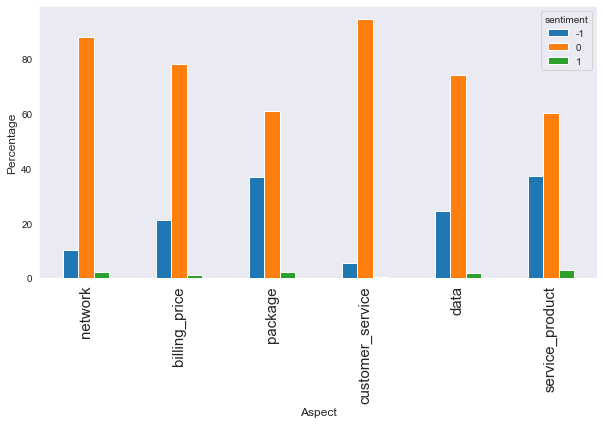

In [ ]:
main_col="sentiment"
corr_mats=[]
for other_col in df.columns[2:8]:
    confusion_matrix = pd.crosstab(df[main_col], df[other_col])
    confusion_matrix =(confusion_matrix[1]/confusion_matrix[1].sum())*100
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=df.columns[2:8])
print(out)
out=out.T

out.plot(kind="bar",figsize=(10,5))
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Aspect', fontsize=12)
locs, labels = plt.xticks(fontsize=15)

In [ ]:
#Analyze network aspect 

def calDFoneGram(df,ngram,word):
    df["Indexes"]= df["cleanAnswer"].str.find(word) 
    df=df[df['Indexes']!=-1]
    docs=df['cleanAnswer'].tolist()
    vectorizer = TfidfVectorizer(ngram_range=ngram,use_idf=True)
    vectors = vectorizer.fit_transform(docs)
    
    #Calculating idf values for vocabulary 
    df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
    df_idf.sort_values(by=['idf_weights'])
    return df_idf

def wordCloud(df,nfeat,ngram,number):
    df=calDFoneGram(df,ngram,number).sort_values("idf_weights",ascending=True)
    feat=list(df.index[:nfeat])
    features=[]
    for x in range(len(feat)):
        f=feat[x].replace(' ','_')
        features.append(f)
    wordcloud1 = WordCloud(width = 800, height = 500, margin=10,random_state=3, collocations=True).generate(' '.join(features))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud1, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.savefig('4g.png')

def hasNumbers(txt):
    vec=list()
    for x in range(len(txt)):
        if(any(char.isdigit() for char in txt[x])):
            w=txt[x]
            vec.append(w)
    return vec

def percentage(df,grpBy,sortVal):
    df=dfNum.groupby(grpBy).count().reset_index().sort_values(sortVal,ascending=False)
    df['percentage'] = (df[sortVal]/df[sortVal].count())*100
    return df     

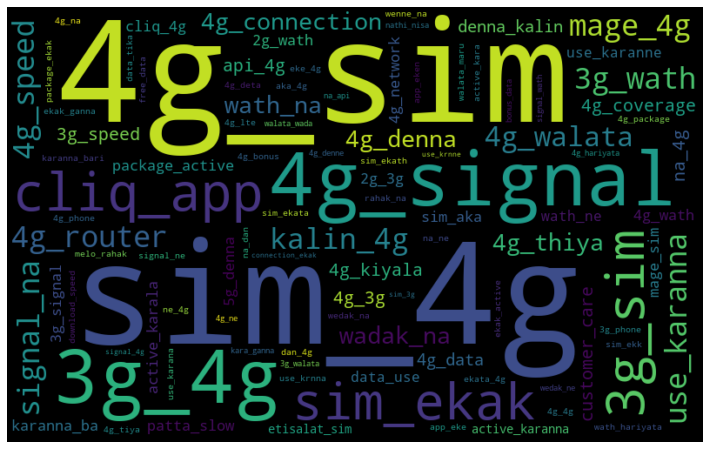

<Figure size 432x288 with 0 Axes>

In [ ]:
wordCloud(df,100,(2,2),"4g")

In [ ]:
def wordcloud_aspects(df,aspect):
    comment_words = '' 
  
    # iterate through the csv file 
    df_=df[df[aspect]==1]
    for val in df_.cleanAnswer: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

def wordcloud_sentiment(df,sentiment):
    comment_words = '' 
  
    # iterate through the csv file 
    df_=df[df['sentiment']==sentiment]
    for val in df_.cleanAnswer: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

Word cloud for the aspect: network


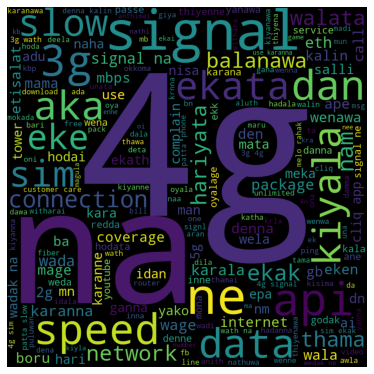

Word cloud for the aspect: billing_price


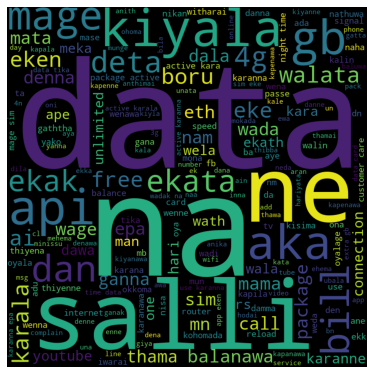

Word cloud for the aspect: package


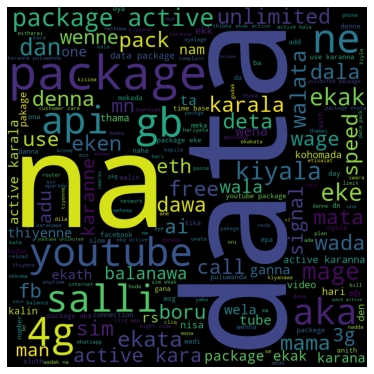

Word cloud for the aspect: customer_service


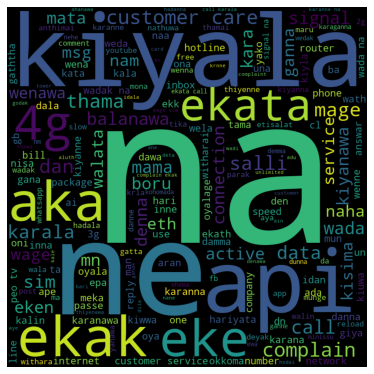

Word cloud for the aspect: data


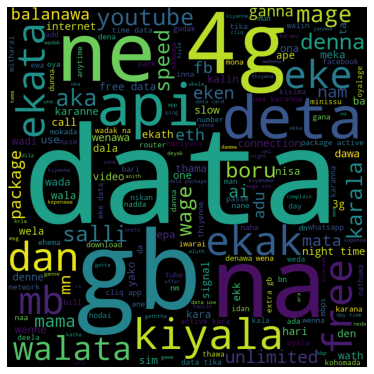

Word cloud for the aspect: service_product


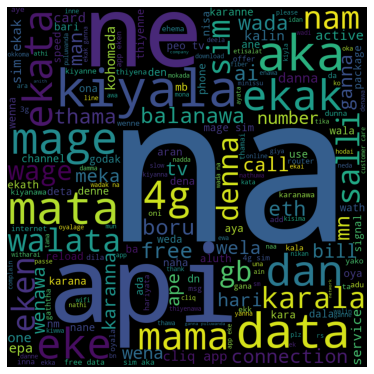

In [ ]:
#Word clouds for the aspects 
cols=df.columns[2:8]
for x in cols:
    print("Word cloud for the aspect:", x)
    wordcloud_aspects(df,x)

Word cloud for the aspect: 0


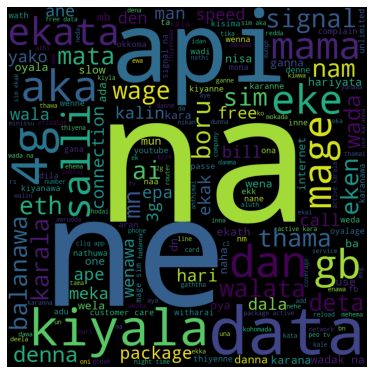

Word cloud for the aspect: 1


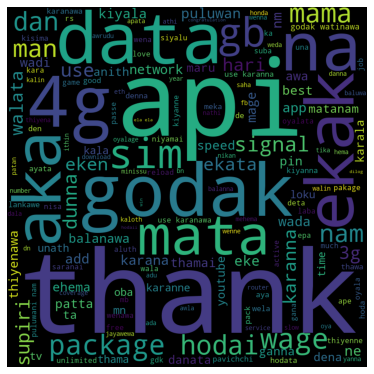

Word cloud for the aspect: -1


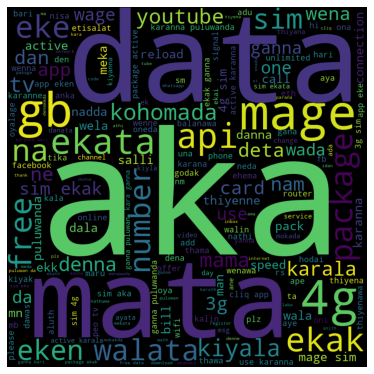

In [ ]:
#Word cloud of the sentiment values 

#sentiment :0 - negative | 1-Positive | -1- neutral
sent=[0,1,-1]
for x in sent:
    print("Word cloud for the aspect:", x)
    wordcloud_sentiment(df,x)

Most frequenst words according to the count vectorizer:  network
Most frequenst words according to the count vectorizer:  billing_price
Most frequenst words according to the count vectorizer:  package
Most frequenst words according to the count vectorizer:  customer_service
Most frequenst words according to the count vectorizer:  data
Most frequenst words according to the count vectorizer:  service_product


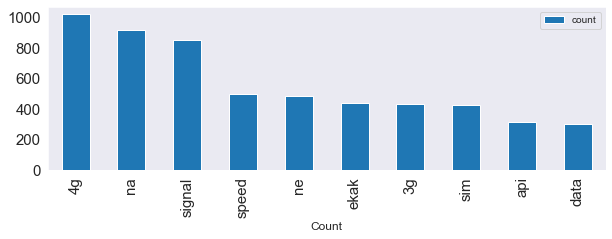

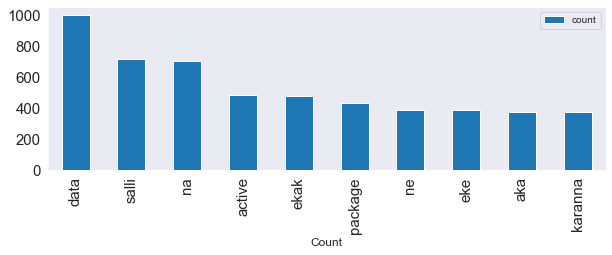

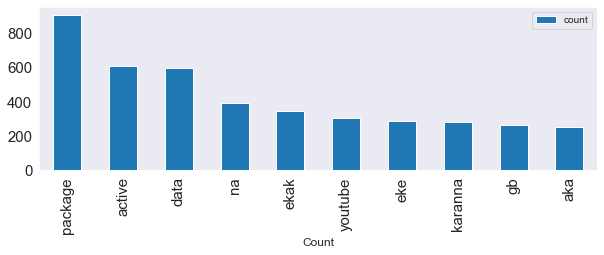

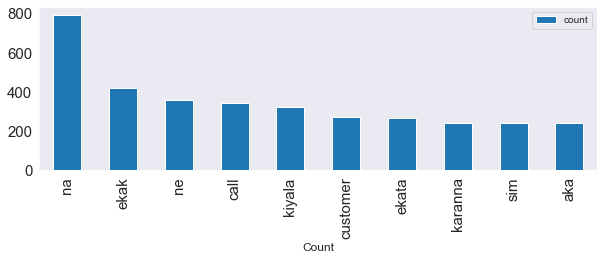

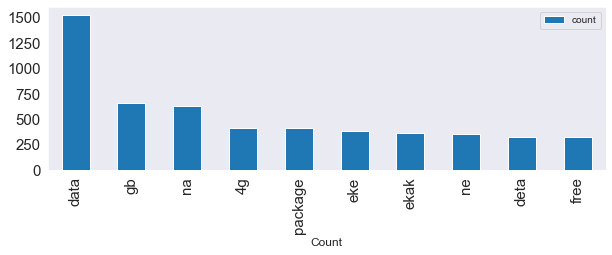

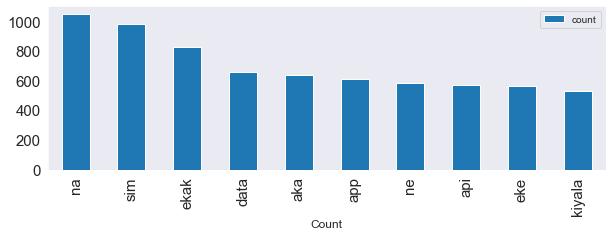

In [ ]:
def countvect(df,feat):
    df_=df[df[feat]==1]
    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    count_vect.fit(df_.cleanAnswer)
    xtrain_count = count_vect.transform(df_.cleanAnswer)

    feat=count_vect.get_feature_names()
    val=list(xtrain_count.toarray().sum(axis=0))
    df_count=pd.DataFrame({'feat':feat,'count':val})
    df_count=df_count.sort_values(by='count',ascending=False)
    df_count=df_count.head(10)
    return df_count
    

for x in df.columns[2:8]:
    print("Most frequenst words according to the count vectorizer: ",x)
    df_count=countvect(df,x)
    ax=df_count.plot.bar(x='feat', y='count',figsize=(10,3),fontsize=15)
    ax.set_xlabel('Aspect',fontdict={'fontsize':12})
    ax.set_xlabel('Count',fontdict={'fontsize':12})

Most frequenst  TFIDF according to the count vectorizer:  network
Most frequenst  TFIDF according to the count vectorizer:  billing_price
Most frequenst  TFIDF according to the count vectorizer:  package
Most frequenst  TFIDF according to the count vectorizer:  customer_service
Most frequenst  TFIDF according to the count vectorizer:  data
Most frequenst  TFIDF according to the count vectorizer:  service_product


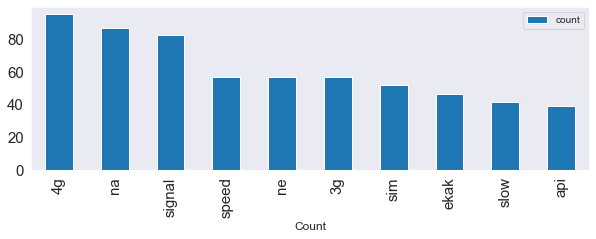

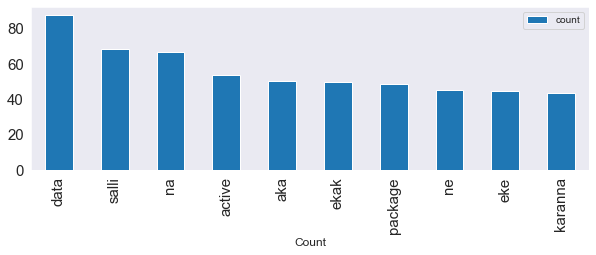

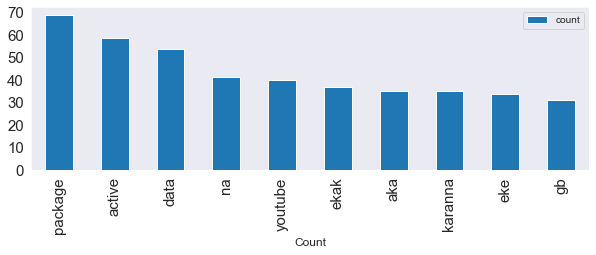

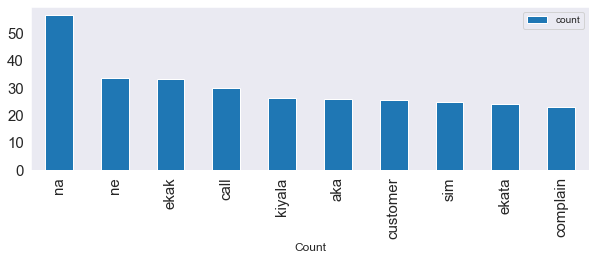

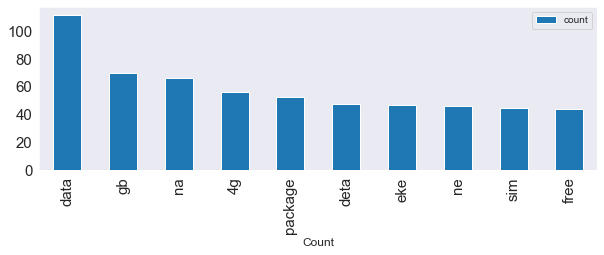

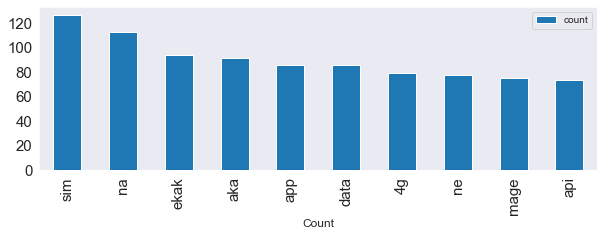

In [ ]:
def countvect(df,feat):
    df_=df[df[feat]==1]
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
    tfidf_vect.fit(df_.cleanAnswer)
    xtrain_tfidf = tfidf_vect.transform(df_.cleanAnswer)

    feat=tfidf_vect.get_feature_names()
    val=list(xtrain_tfidf.toarray().sum(axis=0))
    df_count=pd.DataFrame({'feat':feat,'count':val})
    df_count=df_count.sort_values(by='count',ascending=False)
    df_count=df_count.head(10)

    ax=df_count.plot.bar(x='feat', y='count',figsize=(10,3),fontsize=15)
    ax.set_xlabel('Aspect',fontdict={'fontsize':12})
    ax.set_xlabel('Count',fontdict={'fontsize':12})  
    
for x in df.columns[2:8]:
    print("Most frequenst  TFIDF according to the count vectorizer: ",x)
    countvect(df,x)

In [ ]:
#no of tranliterate/english words
#